In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [28]:
train=pd.read_csv('train/train.csv')

In [29]:
train.head()

,ImageId,NameOfPokemon
0,296.jpg,Pikachu
1,297.jpg,Pikachu
2,298.jpg,Pikachu
3,299.jpg,Pikachu
4,300.jpg,Pikachu


In [31]:
train=train.values

In [41]:
np.random.shuffle(train)

In [42]:
train.shape

(304, 2)

## visualising the image

In [43]:
image=cv2.imread('train/Images/296.jpg')

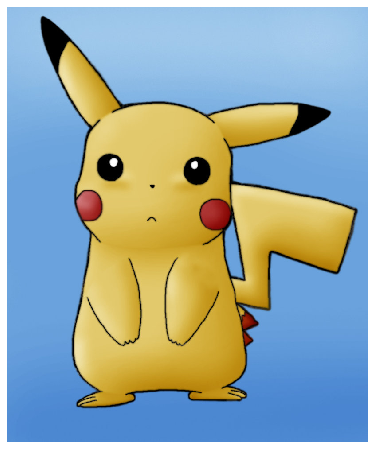

In [44]:
plt.figure(figsize=(8,8))
plt.imshow(image[...,[2,1,0]])
plt.axis('off')
plt.show()

# creating train data

In [45]:
train_dic={}
for fx in os.listdir('train/Images'):
    # reading the image as numpy array
    img=cv2.imread('train/Images/'+fx)
    #converting into rgb
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #resizing the img
    img=cv2.resize(img,(100,100))
    #flattening the image
    flatten=img.reshape((1,-1))
    train_dic[fx]=flatten
    

In [46]:
keys=list(train_dic.keys())
print(keys)

['296.jpg', '297.jpg', '298.jpg', '299.jpg', '300.jpg', '301.jpg', '302.jpg', '303.jpg', '304.jpg', '305.jpg', '306.jpg', '307.jpg', '308.jpg', '309.jpg', '310.jpg', '311.jpg', '312.jpg', '313.jpg', '314.jpg', '315.jpg', '316.jpg', '317.jpg', '318.jpg', '319.jpg', '320.jpg', '321.jpg', '322.jpg', '323.jpg', '324.jpg', '325.jpg', '326.jpg', '327.jpg', '328.jpg', '329.jpg', '330.jpg', '331.jpg', '332.jpg', '333.jpg', '334.jpg', '335.jpg', '336.jpg', '337.jpg', '338.jpg', '339.jpg', '340.jpg', '341.jpg', '342.jpg', '343.jpg', '344.jpg', '345.jpg', '346.jpg', '347.jpg', '348.jpg', '349.jpg', '350.jpg', '351.jpg', '352.jpg', '353.jpg', '354.jpg', '355.jpg', '356.jpg', '357.jpg', '358.jpg', '359.jpg', '360.jpg', '361.jpg', '362.jpg', '363.jpg', '364.jpg', '365.jpg', '366.jpg', '367.jpg', '368.jpg', '369.jpg', '370.jpg', '371.jpg', '372.jpg', '373.jpg', '374.jpg', '375.jpg', '376.jpg', '377.jpg', '378.jpg', '379.jpg', '380.jpg', '381.jpg', '382.jpg', '383.jpg', '384.jpg', '385.jpg', '386.jpg'

In [47]:
train_dic['567.jpg'].shape

(1, 30000)

In [48]:
# creating training data
X_train=np.zeros((len(train_dic),30000))
Y_train=np.zeros((len(train_dic),))
for i,fx in enumerate(train[:,0]):
    for k in keys:
        if k==fx:
            X_train[i]=train_dic[k]
            if train[i][1]=='Pikachu':
                Y_train[i]=0
            elif train[i][1]=='Bulbasaur':
                Y_train[i]=1
            else:
                Y_train[i]=2

In [49]:
X_train

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [ 51.,  76., 130., ..., 126.,  85.,  31.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [255., 255., 255., ..., 255., 255., 255.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [50]:
Y_train

array([1., 2., 1., 0., 1., 0., 2., 2., 2., 1., 0., 0., 0., 1., 1., 1., 2.,
       1., 2., 2., 0., 1., 2., 2., 2., 2., 1., 1., 0., 2., 0., 2., 1., 1.,
       1., 0., 2., 1., 1., 1., 1., 2., 0., 0., 0., 0., 0., 1., 1., 0., 2.,
       2., 0., 0., 2., 0., 2., 1., 1., 1., 0., 2., 0., 2., 1., 2., 0., 1.,
       2., 0., 1., 1., 2., 2., 1., 2., 2., 1., 0., 1., 0., 2., 1., 0., 0.,
       1., 1., 0., 2., 0., 2., 0., 0., 2., 0., 0., 1., 2., 0., 0., 0., 2.,
       1., 0., 2., 1., 2., 1., 1., 1., 2., 0., 0., 0., 2., 0., 2., 2., 1.,
       0., 0., 2., 0., 0., 1., 1., 0., 0., 2., 2., 2., 1., 0., 0., 0., 2.,
       1., 1., 1., 2., 0., 2., 1., 1., 2., 2., 0., 2., 2., 2., 2., 1., 1.,
       0., 0., 0., 2., 0., 0., 2., 0., 2., 2., 0., 1., 2., 2., 2., 0., 1.,
       2., 1., 2., 1., 1., 0., 0., 1., 2., 1., 1., 1., 0., 2., 1., 1., 1.,
       1., 2., 0., 1., 1., 0., 1., 2., 2., 1., 1., 1., 2., 0., 1., 0., 1.,
       1., 2., 0., 0., 2., 0., 1., 1., 1., 1., 2., 0., 2., 0., 0., 1., 2.,
       2., 0., 2., 0., 1.

## creating test data

In [89]:
sample=pd.read_csv('test/Sample_submission.csv')

In [90]:
sample.head()

,ImageId,NameOfPokemon
0,1106.jpg,Pikachu
1,2236.jpg,Pikachu
2,1131.jpg,Pikachu
3,2221.jpg,Pikachu
4,2011.jpg,Pikachu


In [91]:
sample.shape

(123, 2)

In [92]:
sample=sample.values

In [51]:
test_dic={}
for fx in os.listdir('test/Images'):
    img=cv2.imread('test/Images/'+fx)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)  #converting to RBG
    resized=cv2.resize(img,(100,100))   #resizing the images
    flatten=resized.reshape((1,30000))
    test_dic[fx]=flatten

In [52]:
X_test=np.zeros((len(test_dic),30000))

In [93]:
for i,im in enumerate(sample[:,0]): 
    for k in test_dic.keys():
        if k==im:
            X_test[i]=test_dic[k]            

In [94]:
X_test

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [217., 217., 217., ..., 217., 217., 217.],
       [ 48., 128., 104., ..., 172., 208.,  88.],
       [255., 255., 255., ..., 255., 255., 255.]])

# Tuning hyperparameters

In [70]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [64]:
param=[
    {
        'kernel':['linear','poly','rbf','sigmoid'],
        'C':[0.1,0.2,0.3,0.5,1,2,3,4,5]
    }
]

In [65]:
gs=GridSearchCV(estimator=SVC(),param_grid=param,scoring='accuracy',cv=5,n_jobs=8)

In [66]:
gs.fit(X_train,Y_train)

c:\users\kritika\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=8,
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.5, 1, 2, 3, 4, 5],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [95]:
gs.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [96]:
gs.best_score_

0.9013157894736842

# SVM ALGORITHM

In [97]:
svm=SVC(kernel='linear',C=0.1)

In [98]:
svm.fit(X_train,Y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [99]:
Y_pred=svm.predict(X_test)

In [100]:
Y_pred

array([1., 2., 1., 2., 0., 2., 0., 1., 1., 2., 1., 1., 1., 1., 2., 0., 2.,
       2., 0., 2., 0., 1., 2., 1., 2., 2., 1., 1., 0., 0., 0., 0., 2., 1.,
       0., 1., 1., 1., 2., 1., 1., 2., 0., 2., 2., 1., 2., 1., 2., 2., 0.,
       2., 0., 1., 2., 1., 2., 0., 0., 2., 2., 0., 2., 0., 0., 0., 1., 2.,
       0., 1., 2., 1., 1., 0., 2., 2., 2., 2., 0., 1., 0., 1., 2., 1., 0.,
       1., 1., 2., 2., 1., 1., 2., 1., 0., 0., 2., 0., 1., 0., 2., 1., 1.,
       1., 0., 2., 0., 0., 0., 2., 1., 0., 2., 2., 2., 2., 0., 0., 0., 1.,
       0., 2., 1., 0.])

# CREATING CSV

In [102]:
imageid=sample[:,0]
print(imageid)

['1106.jpg' '2236.jpg' '1131.jpg' '2221.jpg' '2011.jpg' '2030.jpg'
 '2035.jpg' '1110.jpg' '1104.jpg' '2217.jpg' '1111.jpg' '1100.jpg'
 '1112.jpg' '1138.jpg' '2238.jpg' '2009.jpg' '2225.jpg' '2240.jpg'
 '2020.jpg' '2209.jpg' '2029.jpg' '1114.jpg' '2201.jpg' '1118.jpg'
 '2025.jpg' '2202.jpg' '1117.jpg' '1119.jpg' '2000.jpg' '2007.jpg'
 '2039.jpg' '2017.jpg' '2215.jpg' '1120.jpg' '2006.jpg' '1116.jpg'
 '1128.jpg' '1125.jpg' '2203.jpg' '1133.jpg' '1137.jpg' '2220.jpg'
 '2012.jpg' '2224.jpg' '2206.jpg' '1122.jpg' '2223.jpg' '1102.jpg'
 '2234.jpg' '2216.jpg' '2016.jpg' '2227.jpg' '2013.jpg' '1113.jpg'
 '2204.jpg' '1101.jpg' '2208.jpg' '2024.jpg' '2031.jpg' '2222.jpg'
 '2211.jpg' '2033.jpg' '2213.jpg' '2231.jpg' '2001.jpg' '2040.jpg'
 '1127.jpg' '2023.jpg' '2015.jpg' '1121.jpg' '2232.jpg' '1139.jpg'
 '1103.jpg' '2018.jpg' '2233.jpg' '2212.jpg' '2210.jpg' '2228.jpg'
 '2026.jpg' '1132.jpg' '2003.jpg' '1129.jpg' '2214.jpg' '1123.jpg'
 '2004.jpg' '1136.jpg' '1140.jpg' '2226.jpg' '2230.jpg' '1135.

In [103]:
Y_answer=[]
for i in Y_pred:
    if i==0:
        Y_answer.append('Pikachu')
    elif i==1:
        Y_answer.append('Bulbasaur')
    else:
        Y_answer.append('Charmander')

In [105]:
Y_answer

['Bulbasaur',
 'Charmander',
 'Bulbasaur',
 'Charmander',
 'Pikachu',
 'Charmander',
 'Pikachu',
 'Bulbasaur',
 'Bulbasaur',
 'Charmander',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Charmander',
 'Pikachu',
 'Charmander',
 'Charmander',
 'Pikachu',
 'Charmander',
 'Pikachu',
 'Bulbasaur',
 'Charmander',
 'Bulbasaur',
 'Charmander',
 'Charmander',
 'Bulbasaur',
 'Bulbasaur',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Charmander',
 'Bulbasaur',
 'Pikachu',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Charmander',
 'Bulbasaur',
 'Bulbasaur',
 'Charmander',
 'Pikachu',
 'Charmander',
 'Charmander',
 'Bulbasaur',
 'Charmander',
 'Bulbasaur',
 'Charmander',
 'Charmander',
 'Pikachu',
 'Charmander',
 'Pikachu',
 'Bulbasaur',
 'Charmander',
 'Bulbasaur',
 'Charmander',
 'Pikachu',
 'Pikachu',
 'Charmander',
 'Charmander',
 'Pikachu',
 'Charmander',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Bulbasaur',
 'Charmander',
 'Pikachu',
 'Bulbasaur',
 'Charmander',
 'Bulbasaur',
 'Bul

In [109]:
lis=list(zip(imageid,Y_answer))

In [110]:
lis

[('1106.jpg', 'Bulbasaur'),
 ('2236.jpg', 'Charmander'),
 ('1131.jpg', 'Bulbasaur'),
 ('2221.jpg', 'Charmander'),
 ('2011.jpg', 'Pikachu'),
 ('2030.jpg', 'Charmander'),
 ('2035.jpg', 'Pikachu'),
 ('1110.jpg', 'Bulbasaur'),
 ('1104.jpg', 'Bulbasaur'),
 ('2217.jpg', 'Charmander'),
 ('1111.jpg', 'Bulbasaur'),
 ('1100.jpg', 'Bulbasaur'),
 ('1112.jpg', 'Bulbasaur'),
 ('1138.jpg', 'Bulbasaur'),
 ('2238.jpg', 'Charmander'),
 ('2009.jpg', 'Pikachu'),
 ('2225.jpg', 'Charmander'),
 ('2240.jpg', 'Charmander'),
 ('2020.jpg', 'Pikachu'),
 ('2209.jpg', 'Charmander'),
 ('2029.jpg', 'Pikachu'),
 ('1114.jpg', 'Bulbasaur'),
 ('2201.jpg', 'Charmander'),
 ('1118.jpg', 'Bulbasaur'),
 ('2025.jpg', 'Charmander'),
 ('2202.jpg', 'Charmander'),
 ('1117.jpg', 'Bulbasaur'),
 ('1119.jpg', 'Bulbasaur'),
 ('2000.jpg', 'Pikachu'),
 ('2007.jpg', 'Pikachu'),
 ('2039.jpg', 'Pikachu'),
 ('2017.jpg', 'Pikachu'),
 ('2215.jpg', 'Charmander'),
 ('1120.jpg', 'Bulbasaur'),
 ('2006.jpg', 'Pikachu'),
 ('1116.jpg', 'Bulbasaur'),


In [111]:
df=pd.DataFrame(lis,columns=['ImageId','NameOfPokemon'])

In [112]:
df

,ImageId,NameOfPokemon
0,1106.jpg,Bulbasaur
1,2236.jpg,Charmander
2,1131.jpg,Bulbasaur
3,2221.jpg,Charmander
4,2011.jpg,Pikachu
5,2030.jpg,Charmander
6,2035.jpg,Pikachu
7,1110.jpg,Bulbasaur
8,1104.jpg,Bulbasaur
9,2217.jpg,Charmander


In [113]:
df.to_csv('svm_solutions.csv',index=False)